After loading data from Timber, it has to be preprocessed. It has to be decided when the source was stable, when voltage breakdowns occured an so on. These are tasks that in practice only have to be done once, which is the reason why this notebook exists. One is able to specify a raw data file and this notebook will export a labeled one together with visualizations of the performed tasks so that a visual quality check can be done.

In [28]:
%run ../ionsrcopt/import_notebooks/Setup.ipynb

In [29]:
%run ../ionsrcopt/import_notebooks/Preprocessing.ipynb

First we need to read the data into a dataframe that we will manipulate and save afterwards. We will not do any column preselection at this point.

In [24]:
input_file = '../Data_Raw/Feb2018.csv'
output_file = '../Data_Preprocessed/Feb2018.csv'

In [25]:
df = read_data_from_csv(input_file, None, None)
df = convert_column_types(df)
#df.dropna(inplace=True)
df.shape

Loading data from csv file '../Data_Raw/Feb2018.csv'
Started type conversion of columns...
Converting column 'IP.NSRCGEN:BIASDISCAQNV' to 'float32'
Converting column 'IP.NSRCGEN:GASAQN' to 'float32'
Converting column 'IP.SOLINJ.ACQUISITION:CURRENT' to 'float32'
Converting column 'IP.SOLCEN.ACQUISITION:CURRENT' to 'float32'
Converting column 'IP.SOLEXT.ACQUISITION:CURRENT' to 'float32'
Converting column 'IP.NSRCGEN:OVEN1AQNP' to 'float32'
Converting column 'IP.NSRCGEN:OVEN2AQNP' to 'float32'
Converting column 'IP.SAIREM2:FORWARDPOWER' to 'float32'
Converting column 'IP.NSRCGEN:SOURCEHTAQNI' to 'float32'
Converting column 'ITF.BCT25:CURRENT' to 'float32'


(42182, 10)

In [27]:
df.columns

Index(['IP.NSRCGEN:BIASDISCAQNV', 'IP.NSRCGEN:GASAQN', 'IP.NSRCGEN:OVEN1AQNP',
       'IP.NSRCGEN:OVEN2AQNP', 'IP.NSRCGEN:SOURCEHTAQNI',
       'IP.SAIREM2:FORWARDPOWER', 'IP.SOLCEN.ACQUISITION:CURRENT',
       'IP.SOLEXT.ACQUISITION:CURRENT', 'IP.SOLINJ.ACQUISITION:CURRENT',
       'ITF.BCT25:CURRENT'],
      dtype='object')

In [26]:
df

,IP.NSRCGEN:BIASDISCAQNV,IP.NSRCGEN:GASAQN,IP.NSRCGEN:OVEN1AQNP,IP.NSRCGEN:OVEN2AQNP,IP.NSRCGEN:SOURCEHTAQNI,IP.SAIREM2:FORWARDPOWER,IP.SOLCEN.ACQUISITION:CURRENT,IP.SOLEXT.ACQUISITION:CURRENT,IP.SOLINJ.ACQUISITION:CURRENT,ITF.BCT25:CURRENT
TIMESTAMP,,,,,,,,,,
2018-02-01 00:02:32.855,NaN,NaN,NaN,NaN,0.1612,NaN,NaN,NaN,NaN,NaN
2018-02-01 00:03:01.655,-1.0,NaN,NaN,NaN,0.1612,NaN,NaN,NaN,NaN,NaN
2018-02-01 00:03:13.655,-1.0,10.000,0.000,0.0,0.1612,NaN,NaN,NaN,NaN,NaN
2018-02-01 00:07:32.855,-1.0,10.000,0.000,0.0,0.1612,NaN,NaN,NaN,NaN,NaN
2018-02-01 00:08:01.655,-1.0,10.000,0.000,0.0,0.1612,NaN,NaN,NaN,NaN,NaN
2018-02-01 00:08:13.655,-1.0,10.000,0.000,0.0,0.1612,NaN,NaN,NaN,NaN,NaN
2018-02-01 00:12:32.855,-1.0,10.000,0.000,0.0,0.1612,NaN,NaN,NaN,NaN,NaN
2018-02-01 00:13:01.655,-1.0,10.000,0.000,0.0,0.1612,NaN,NaN,NaN,NaN,NaN
2018-02-01 00:13:13.655,-1.0,10.000,0.000,0.0,0.1612,NaN,NaN,NaN,NaN,NaN


Because data is only registered when a parameter changes, the datapoints can correspond to a different time duration. When we do the clustering we need to take this into account using some form of weight. We will create a column that gives the duration of a datapoint in seconds.

In [21]:
def timedelta_to_seconds(timedelta):
    if not pd.isnull(timedelta):
        return timedelta.total_seconds()
    else:
        return np.nan
    
df[ProcessingFeatures.DATAPOINT_DURATION] = (df.index.to_series().diff(-1)).apply(timedelta_to_seconds).values
df[ProcessingFeatures.DATAPOINT_DURATION] *= -1

The next thing we are going to do, is marking the source as stable/unstable. The parameters used are from experiments on the Nov2018 data.

In [12]:
value_column = SourceFeatures.BCT25_CURRENT
weight_column = ProcessingFeatures.DATAPOINT_DURATION
sliding_window_size_mean=1500
sliding_window_size_std=2000
minimum_mean=0.022
#minimum_mean=0.027 #for Nov 2018
#minimum_mean=0.035 #for Nov 2016
maximum_variance=0.000035

df[ProcessingFeatures.SOURCE_STABILITY] = stability_mean_variance_classification(
                            df, 
                            value_column=value_column, 
                            weight_column=weight_column,
                            sliding_window_size_mean=sliding_window_size_mean,
                            sliding_window_size_std=sliding_window_size_std,
                            minimum_mean=minimum_mean, 
                            maximum_variance=maximum_variance)

The next thing we are interested in are the high voltage breakdowns.

In [14]:
column = SourceFeatures.SOURCEHTAQNI
window_size = 40
threshold = 0.25

df[ProcessingFeatures.HT_VOLTAGE_BREAKDOWN] = detect_breakdowns(df, column, window_size, threshold)
df = df.astype({ProcessingFeatures.HT_VOLTAGE_BREAKDOWN : 'int64'})

All rows that still have NaN values have missing information that can not be aquired from the data. Hence we remove these rows.

In [15]:
df.dropna(inplace=True)
df.shape

(670764, 13)

### Visualizations
#### Source classification

<IPython.core.display.Javascript object>


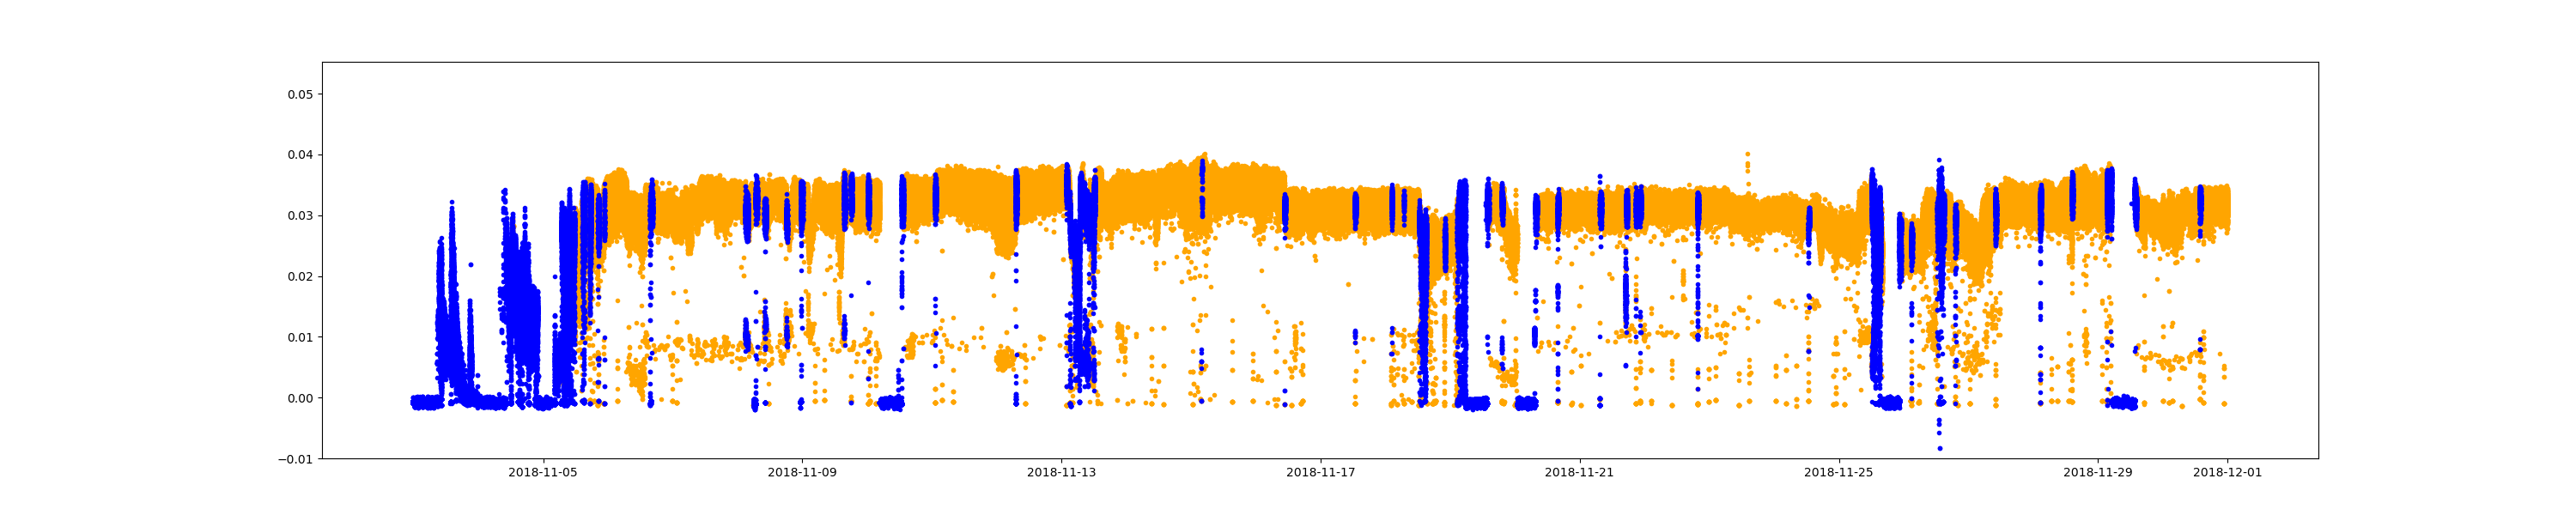

In [16]:
%matplotlib notebook

import matplotlib.pyplot as plt
import matplotlib
plt.rcParams["figure.figsize"] = (30,6)
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

dates_stable = matplotlib.dates.date2num(df.loc[df[ProcessingFeatures.SOURCE_STABILITY] == 1].index.values)
dates_unstable = matplotlib.dates.date2num(df.loc[df[ProcessingFeatures.SOURCE_STABILITY] == 0].index.values)

fig = plt.figure()
ax = plt.subplot('111')
ax.plot_date(dates_stable, df.loc[df[ProcessingFeatures.SOURCE_STABILITY] == 1, SourceFeatures.BCT25_CURRENT].values, fmt='.', c='orange')
ax.plot_date(dates_unstable, df.loc[df[ProcessingFeatures.SOURCE_STABILITY] == 0, SourceFeatures.BCT25_CURRENT].values, fmt='.', c='blue')
ax.set_ylim(-0.01, None)

plt.show()

#### Voltage Breakdowns

<IPython.core.display.Javascript object>


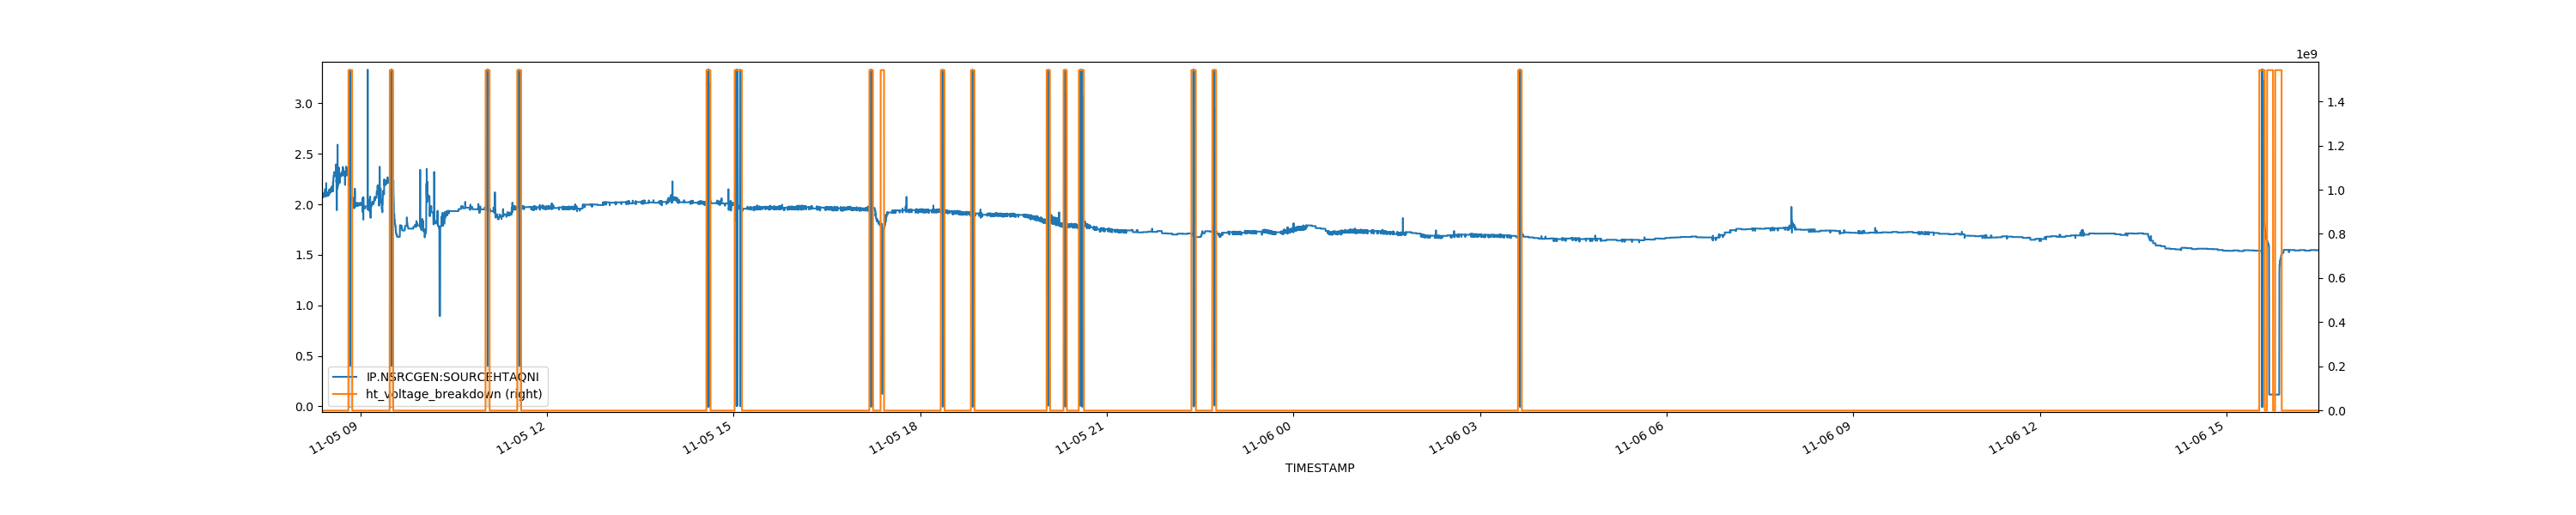

In [17]:
%matplotlib notebook

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,6)

s = df.loc[(df.index >= '2018-11-09 17:58.500') & (df.index <= '2018-11-09 18:02')].copy()

ax1 = df.plot(y=[SourceFeatures.SOURCEHTAQNI, ProcessingFeatures.HT_VOLTAGE_BREAKDOWN], secondary_y=[ProcessingFeatures.HT_VOLTAGE_BREAKDOWN])
plt.show()

Now we can save the frame as a csv file. To save storage and increase loading time we set consequitve duplicates to nan. This can be reversed while loading using pd.fillna

In [18]:
df[df.shift(1)==df] = np.nan
df.to_csv(output_file)
print("Saved preprocessing of {} to {}.".format(input_file, output_file))

Saved preprocessing of ../Data_Raw/Nov2018.csv to ../Data_Preprocessed/Nov2018.csv.
